<a href="https://colab.research.google.com/github/capramc/DESAFIO_02/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [35]:
import pandas as pd
df = pd.read_json('/content/TelecomX_Data.json')
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformação

In [36]:
df_normalizado_customer = pd.json_normalize(df['customer'])
df_normalizado_phone = pd.json_normalize(df['phone'])
df_normalizado_internet = pd.json_normalize(df['internet'])
df_normalizado_account = pd.json_normalize(df['account'])

df_normalizado_customer = pd.concat([df[['customerID', 'Churn']], df_normalizado_customer, df_normalizado_phone, df_normalizado_internet, df_normalizado_account], axis=1)
df_normalizado_customer.head()
print(f"Remaining rows: {len(df_normalizado_customer)}")


Remaining rows: 7267


In [37]:
print(df_normalizado_customer['Churn'].unique())

# Replace empty strings and spaces with actual NaN
df_normalizado_customer['Churn'] = df_normalizado_customer['Churn'].replace(['', ' '], pd.NA)

# Now drop the rows with missing churn
df_normalizado_customer = df_normalizado_customer[df_normalizado_customer['Churn'].notna()]
print(df_normalizado_customer['Churn'].isna().sum())  # should print 0


['No' 'Yes' '']
0


In [38]:
df_normalizado_customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

In [39]:
df_normalizado_customer['Charges.Total'] = pd.to_numeric(df_normalizado_customer['Charges.Total'], errors='coerce')
df_normalizado_customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

In [40]:
df_normalizado_customer

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [41]:
print(df_normalizado_customer['Churn'].isna().sum())  # should print 0
#invalidos = df_normalizado_customer[pd.to_numeric(df_normalizado_customer['Churn'], errors='coerce').isna() & df_normalizado_customer['Churn'].notna()]
#invalidos

0


In [42]:
df_normalizado_customer = df_normalizado_customer.apply(lambda col: col.fillna(0) if pd.api.types.is_numeric_dtype(col) else col)

In [43]:
df_normalizado_customer.isnull().values.any()

np.False_

In [44]:
df_normalizado_customer.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [45]:
df_normalizado_customer.fillna(0, inplace=True)
df_normalizado_customer.isnull().values.any()

np.False_

In [46]:
df_normalizado_customer.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [47]:
#df_normalizado_customer['gender'].unique()
#df_normalizado_customer['SeniorCitizen'].unique()
#df_normalizado_customer['Partner'].unique()
#df_normalizado_customer['Dependents'].unique()
#df_normalizado_customer['PhoneService'].unique()
#df_normalizado_customer['MultipleLines'].unique()
#df_normalizado_customer['MultipleLines'].value_counts(dropna=False)
#df_normalizado_customer['InternetService'].unique()
#df_normalizado_customer['InternetService'].value_counts(dropna=False)
#df_normalizado_customer['OnlineSecurity'].unique()
#df_normalizado_customer['OnlineSecurity'].value_counts(dropna=False)
#df_normalizado_customer['OnlineBackup'].unique()
#df_normalizado_customer['OnlineBackup'].value_counts(dropna=False)
#df_normalizado_customer['DeviceProtection'].unique()
#df_normalizado_customer['DeviceProtection'].value_counts(dropna=False)
#df_normalizado_customer['TechSupport'].unique()
#df_normalizado_customer['TechSupport'].value_counts(dropna=False)
#df_normalizado_customer['StreamingTV'].unique()
#df_normalizado_customer['StreamingTV'].value_counts(dropna=False)
#df_normalizado_customer['StreamingMovies'].unique()
#df_normalizado_customer['StreamingMovies'].value_counts(dropna=False)
#df_normalizado_customer['Contract'].unique()
#df_normalizado_customer['Contract'].value_counts(dropna=False)
#df_normalizado_customer['PaperlessBilling'].unique()
#df_normalizado_customer['PaymentMethod'].unique()
#df_normalizado_customer['PaymentMethod'].value_counts(dropna=False)


In [48]:
df_normalizado_customer['Daily.Charge'] = (df_normalizado_customer['Charges.Monthly'] / 30.44).round(2)
df_normalizado_customer.head()
df_normalizado_customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

In [49]:
df_normalizado_customer.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Daily.Charge
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.16
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.97
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.43
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.22
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.76


In [50]:
df_normalizado_customer = df_normalizado_customer.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [51]:
#for col in df_normalizado_customer.select_dtypes(include='object').columns:
#    df_normalizado_customer[col] = df_normalizado_customer[col].replace({'No': 0, 'Yes': 1})


#📊 Carga e análise

In [52]:
media_gastos_diarios_geral = df_normalizado_customer['Daily.Charge'].mean().round(2)
media_gastos_diarios_genders = df_normalizado_customer.groupby('gender')['Daily.Charge'].mean().round(2)
media_gastos_diarios_genders_senior = df_normalizado_customer.groupby(['gender','SeniorCitizen'])['Daily.Charge'].mean().round(2)


print("Média de gastos diários geral:", media_gastos_diarios_geral)
print("\nMédia de gastos diários por gênero:", media_gastos_diarios_genders)

result = media_gastos_diarios_genders_senior.reset_index()
result['SeniorCitizen'] = result['SeniorCitizen'].map({0: 'No', 1: 'Yes'})
print("\nMédia de gastos diários por gênero e senioridade:", result)

mediana_gastos_diarios_geral = df_normalizado_customer['Daily.Charge'].median()
print("\nMediana de gastos diários geral:", mediana_gastos_diarios_geral)

desvio_padrao_gastos_diarios_geral = df_normalizado_customer['Daily.Charge'].std()
print("\nDesvio padrão de gastos diários geral:", desvio_padrao_gastos_diarios_geral)

Média de gastos diários geral: 2.13

Média de gastos diários por gênero: gender
Female    2.14
Male      2.11
Name: Daily.Charge, dtype: float64

Média de gastos diários por gênero e senioridade:    gender SeniorCitizen  Daily.Charge
0  Female            No          2.04
1  Female           Yes          2.66
2    Male            No          2.02
3    Male           Yes          2.58

Mediana de gastos diários geral: 2.31

Desvio padrão de gastos diários geral: 0.9884345196949657


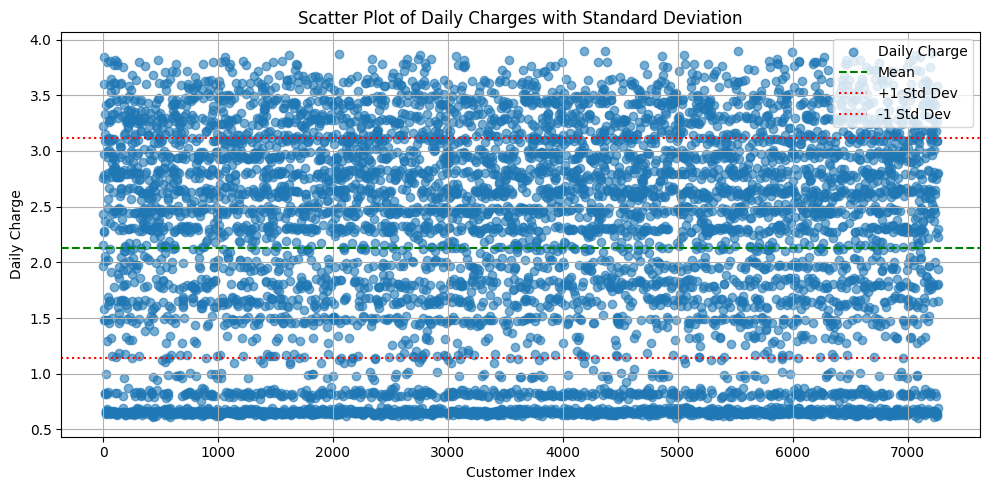

In [53]:
import matplotlib.pyplot as plt
# Calculate mean and std
media_geral = df_normalizado_customer['Daily.Charge'].mean()
desvio_padrao = df_normalizado_customer['Daily.Charge'].std()

# Create the plot
plt.figure(figsize=(10, 5))
plt.scatter(df_normalizado_customer.index, df_normalizado_customer['Daily.Charge'], alpha=0.6, label='Daily Charge')

# Add mean and std lines
plt.axhline(media_geral, color='green', linestyle='--', label='Mean')
plt.axhline(media_geral + desvio_padrao, color='red', linestyle=':', label='+1 Std Dev')
plt.axhline(media_geral - desvio_padrao, color='red', linestyle=':', label='-1 Std Dev')

# Labels
plt.title('Scatter Plot of Daily Charges with Standard Deviation')
plt.xlabel('Customer Index')
plt.ylabel('Daily Charge')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [54]:
#print(df_normalizado_customer['Churn'].unique())
#df_normalizado_customer

# Strip spaces and normalize to lowercase
#df_normalizado_customer['Churn'] = df_normalizado_customer['Churn'].astype(str).str.strip().str.capitalize()

# Replace invalid values with NaN (anything not Yes or No)
#df_normalizado_customer.loc[~df['Churn'].isin(['Yes', 'No']), 'Churn'] = pd.NA

# Drop NaN values in Churn
#df_normalizado_customer = df_normalizado_customer[df_normalizado_customer['Churn'].notna()]
#print(df_normalizado_customer['Churn'].isna().sum())  # should be 0

df_normalizado_customer


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Daily.Charge
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.16
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.97
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.43
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.22
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.81
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.80
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.65
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.23



=== Classification Report ===
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1036
           1       0.63      0.46      0.53       373

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.77      0.79      0.77      1409


=== Top 10 Features Influencing Churn ===
tenure              0.200596
Charges.Monthly     0.174824
Daily.Charge        0.143222
Contract            0.084734
PaymentMethod       0.057355
TechSupport         0.046801
OnlineSecurity      0.036285
gender              0.029655
OnlineBackup        0.027380
PaperlessBilling    0.026239
dtype: float64


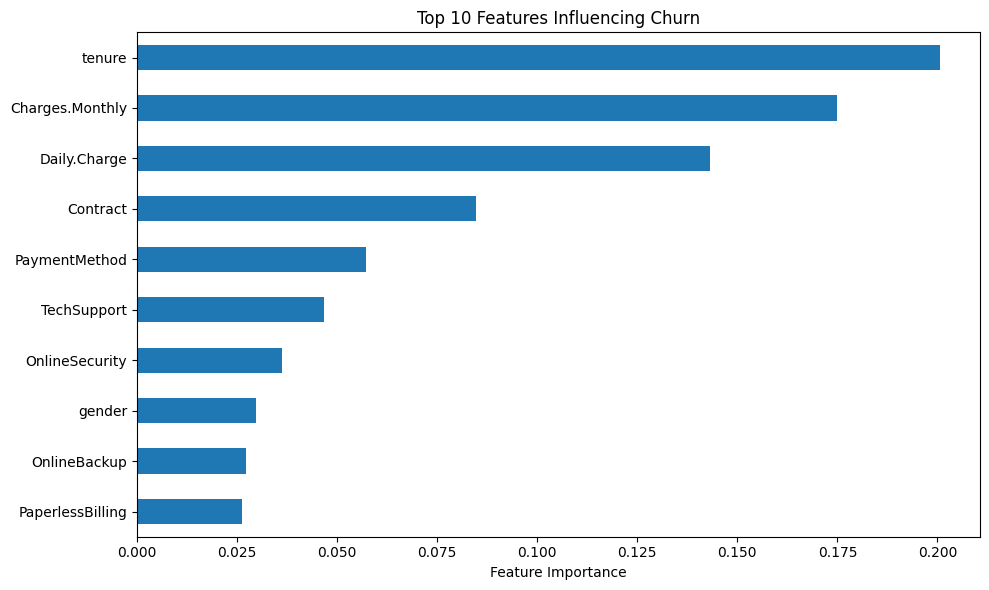

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# === Step 0: Work on a clean copy of your original DataFrame ===
df = df_normalizado_customer.copy()

# === Step 1: Normalize and clean 'Churn' column ===
df['Churn'] = df['Churn'].astype(str).str.strip().str.capitalize()
df = df[df['Churn'].isin(['Yes', 'No'])]  # Keep only valid values
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0}).astype(int)

# === Step 2: Convert all 'Yes'/'No' columns to 1/0 globally ===
yes_no_map = {'Yes': 1, 'No': 0}
for col in df.columns:
    if df[col].dtype == 'object' and df[col].isin(yes_no_map.keys()).all():
        df[col] = df[col].map(yes_no_map)

# === Step 3: Create 'HighSpender' based on standard deviation of Daily.Charge ===
std_daily_charge = df['Daily.Charge'].std()
df['HighSpender'] = (df['Daily.Charge'] > std_daily_charge).astype(int)

# === Step 4: Define features and exclude irrelevant columns ===
exclude_cols = ['customerID', 'Charges.Total', 'Churn']
features = [col for col in df.columns if col not in exclude_cols]

# === Step 5: Encode categorical string features ===
df_encoded = df.copy()
label_encoders = {}
for col in features:
    if df_encoded[col].dtype == 'object' or df_encoded[col].dtype.name == 'category':
        df_encoded[col] = df_encoded[col].astype(str)
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        label_encoders[col] = le

# === Step 6: Split into training and test sets ===
X = df_encoded[features]
y = df_encoded['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Step 7: Train Random Forest model ===
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# === Step 8: Evaluate the model ===
y_pred = model.predict(X_test)
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# === Step 9: Show feature importance ===
importances = pd.Series(model.feature_importances_, index=features)
importances = importances.sort_values(ascending=False)

print("\n=== Top 10 Features Influencing Churn ===")
print(importances.head(10))

# === Step 10: Plot top 10 feature importances ===
plt.figure(figsize=(10, 6))
importances.head(10).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('Top 10 Features Influencing Churn')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()


/tmp/ipython-input-56-2619717028.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('tenure_group')['Charges.Monthly'].mean().round(2)


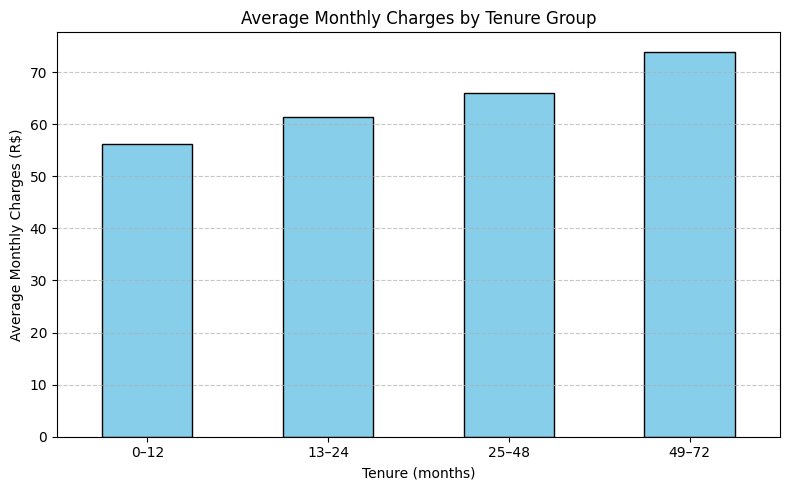

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create tenure groups (e.g., 0–12, 13–24, etc.)
df['tenure_group'] = pd.cut(
    df['tenure'],
    bins=[0, 12, 24, 48, 72],
    labels=['0–12', '13–24', '25–48', '49–72'],
    right=True
)

# Step 2: Calculate average monthly charges per group
grouped = df.groupby('tenure_group')['Charges.Monthly'].mean().round(2)

# Step 3: Plot
plt.figure(figsize=(8, 5))
grouped.plot(kind='bar', color='skyblue', edgecolor='black')

# Labels and titles
plt.title('Average Monthly Charges by Tenure Group')
plt.xlabel('Tenure (months)')
plt.ylabel('Average Monthly Charges (R$)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


/tmp/ipython-input-57-1402757748.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_unique.groupby(['tenure_group', 'Churn'])['Charges.Total'].mean().reset_index()


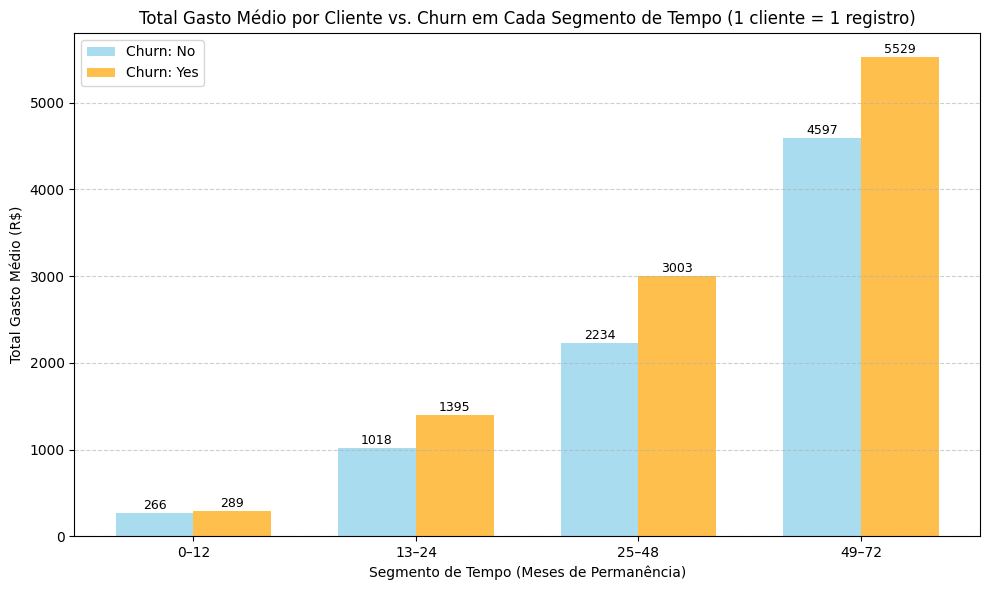

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Copiar o DataFrame original
df = df_normalizado_customer.copy()

# Limpeza do campo Churn
df['Churn'] = df['Churn'].astype(str).str.strip().str.capitalize()
df = df[df['Churn'].isin(['Yes', 'No'])]
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0}).astype(int)

# === Agrupamento por customerID para garantir um único registro por cliente ===
# Mantemos o maior tenure e o maior Charges.Total (considerando o maior valor consolidado)
df_unique = df.groupby('customerID').agg({
    'tenure': 'max',
    'Charges.Total': 'max',
    'Churn': 'max'
}).reset_index()

# Criar os grupos de tempo de permanência
df_unique['tenure_group'] = pd.cut(
    df_unique['tenure'],
    bins=[0, 12, 24, 48, 72],
    labels=['0–12', '13–24', '25–48', '49–72'],
    right=True
)

# Agrupamento final por tenure_group e Churn, calculando o gasto médio total
grouped = df_unique.groupby(['tenure_group', 'Churn'])['Charges.Total'].mean().reset_index()

# Substituir 0/1 por labels legíveis para o gráfico
grouped['Churn'] = grouped['Churn'].map({0: 'No', 1: 'Yes'})

# === Preparar o gráfico com barras lado a lado ===
bar_width = 0.35
tenure_groups = grouped['tenure_group'].unique()
x = np.arange(len(tenure_groups))

# Separar dados de churn = No e churn = Yes
subset_no = grouped[grouped['Churn'] == 'No'].sort_values('tenure_group')
subset_yes = grouped[grouped['Churn'] == 'Yes'].sort_values('tenure_group')

# Criar gráfico
plt.figure(figsize=(10, 6))
bars1 = plt.bar(x - bar_width/2, subset_no['Charges.Total'], width=bar_width, alpha=0.7, label='Churn: No', color='skyblue')
bars2 = plt.bar(x + bar_width/2, subset_yes['Charges.Total'], width=bar_width, alpha=0.7, label='Churn: Yes', color='orange')

# Adicionar os valores no topo de cada barra
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, f'{yval:.0f}', ha='center', va='bottom', fontsize=9)

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, f'{yval:.0f}', ha='center', va='bottom', fontsize=9)

# Ajustes finais
plt.title('Total Gasto Médio por Cliente vs. Churn em Cada Segmento de Tempo (1 cliente = 1 registro)')
plt.xlabel('Segmento de Tempo (Meses de Permanência)')
plt.ylabel('Total Gasto Médio (R$)')
plt.xticks(x, tenure_groups)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


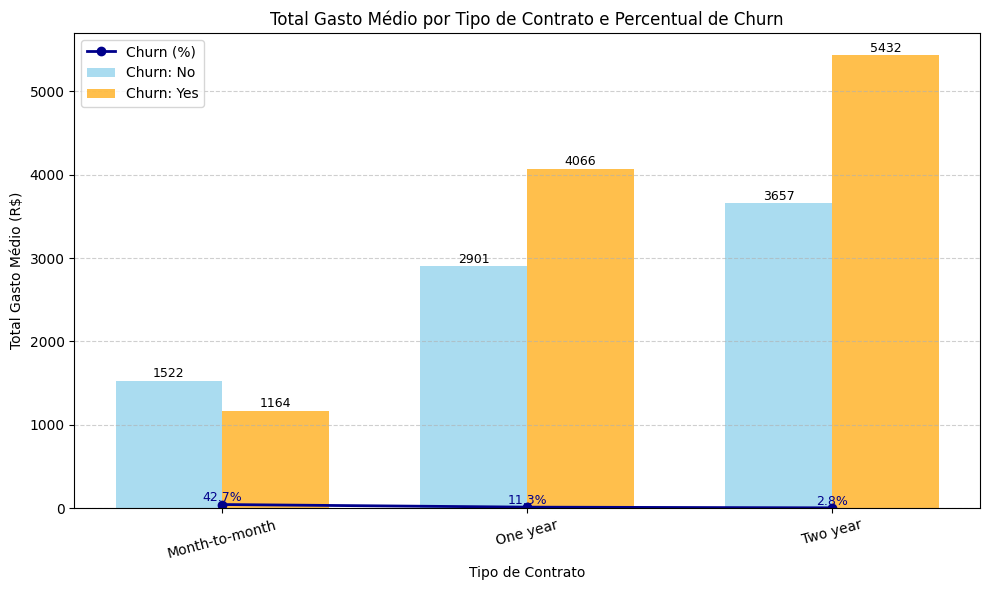

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Copiar o DataFrame original
df = df_normalizado_customer.copy()

# Limpeza do campo Churn
df['Churn'] = df['Churn'].astype(str).str.strip().str.capitalize()
df = df[df['Churn'].isin(['Yes', 'No'])]
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0}).astype(int)

# Limpeza do campo Contract
df['Contract'] = df['Contract'].astype(str).str.strip()

# === Garantir 1 único registro por cliente ===
df_unique = df.groupby('customerID').agg({
    'tenure': 'max',
    'Charges.Total': 'max',
    'Contract': 'first',
    'Churn': 'max'
}).reset_index()

# Gasto médio por contrato e churn
grouped = df_unique.groupby(['Contract', 'Churn'])['Charges.Total'].mean().reset_index()

# Percentual de churn por tipo de contrato
churn_rate = df_unique.groupby('Contract')['Churn'].mean().reset_index()
churn_rate['Churn_percent'] = churn_rate['Churn'] * 100

# Mapear churn binário para texto no gráfico de barras
grouped['Churn'] = grouped['Churn'].map({0: 'No', 1: 'Yes'})

# Preparar gráfico
contract_types = grouped['Contract'].unique()
bar_width = 0.35
x = np.arange(len(contract_types))

# Separar dados churn No e Yes
subset_no = grouped[grouped['Churn'] == 'No'].sort_values('Contract')
subset_yes = grouped[grouped['Churn'] == 'Yes'].sort_values('Contract')

plt.figure(figsize=(10, 6))

# Barras lado a lado
bars1 = plt.bar(x - bar_width/2, subset_no['Charges.Total'], width=bar_width, alpha=0.7, label='Churn: No', color='skyblue')
bars2 = plt.bar(x + bar_width/2, subset_yes['Charges.Total'], width=bar_width, alpha=0.7, label='Churn: Yes', color='orange')

# Valores no topo das barras
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, f'{yval:.0f}', ha='center', va='bottom', fontsize=9)

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, f'{yval:.0f}', ha='center', va='bottom', fontsize=9)

# Linha de percentual de churn
churn_rate = churn_rate.sort_values('Contract')
plt.plot(x, churn_rate['Churn_percent'], color='darkblue', marker='o', linewidth=2, label='Churn (%)')

# Percentual no topo dos pontos da linha
for i, pct in enumerate(churn_rate['Churn_percent']):
    plt.text(x[i], pct + 2, f'{pct:.1f}%', ha='center', va='bottom', color='darkblue', fontsize=9)

# Ajustes finais
plt.title('Total Gasto Médio por Tipo de Contrato e Percentual de Churn')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Total Gasto Médio (R$)')
plt.xticks(x, contract_types, rotation=15)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



=== Percentual de Churn por Tipo de Contrato ===
         Contract  Churn_percent
0  Month-to-month          42.71
1        One year          11.27
2        Two year           2.83


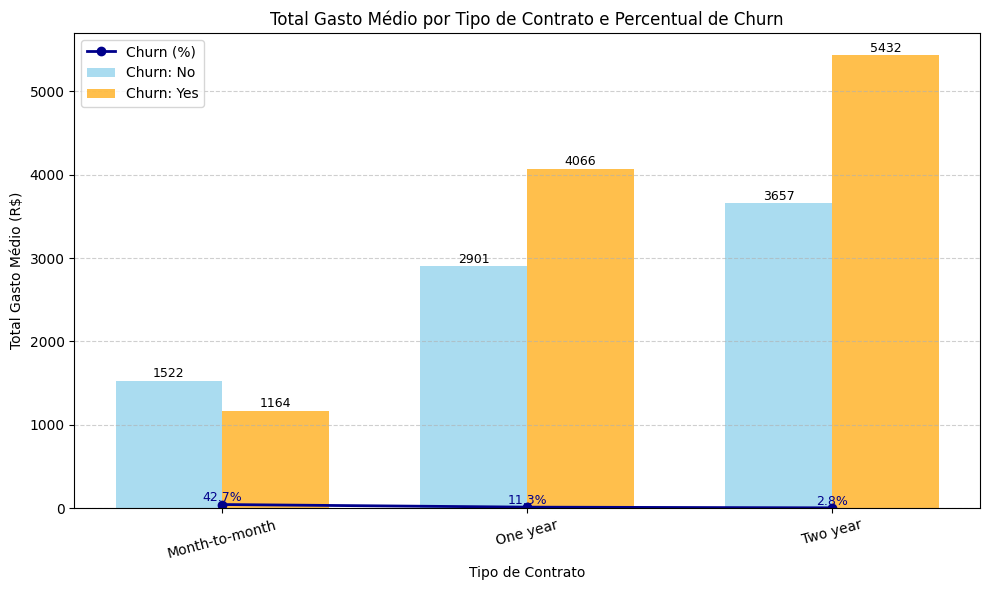

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Copiar o DataFrame original
df = df_normalizado_customer.copy()

# Limpeza do campo Churn
df['Churn'] = df['Churn'].astype(str).str.strip().str.capitalize()
df = df[df['Churn'].isin(['Yes', 'No'])]
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0}).astype(int)

# Limpeza do campo Contract
df['Contract'] = df['Contract'].astype(str).str.strip()

# Garantir 1 único registro por cliente
df_unique = df.groupby('customerID').agg({
    'tenure': 'max',
    'Charges.Total': 'max',
    'Contract': 'first',
    'Churn': 'max'
}).reset_index()

# Gasto médio por contrato e churn
grouped = df_unique.groupby(['Contract', 'Churn'])['Charges.Total'].mean().reset_index()

# Percentual de churn por tipo de contrato
churn_rate = df_unique.groupby('Contract')['Churn'].mean().reset_index()
churn_rate['Churn_percent'] = churn_rate['Churn'] * 100

# === Impressão do percentual de churn na tela ===
print("\n=== Percentual de Churn por Tipo de Contrato ===")
print(churn_rate[['Contract', 'Churn_percent']].round(2))

# Mapear churn binário para texto no gráfico de barras
grouped['Churn'] = grouped['Churn'].map({0: 'No', 1: 'Yes'})

# Preparar gráfico
contract_types = grouped['Contract'].unique()
bar_width = 0.35
x = np.arange(len(contract_types))

# Separar dados churn No e Yes
subset_no = grouped[grouped['Churn'] == 'No'].sort_values('Contract')
subset_yes = grouped[grouped['Churn'] == 'Yes'].sort_values('Contract')
churn_rate = churn_rate.sort_values('Contract')

plt.figure(figsize=(10, 6))

# Barras lado a lado
bars1 = plt.bar(x - bar_width/2, subset_no['Charges.Total'], width=bar_width, alpha=0.7, label='Churn: No', color='skyblue')
bars2 = plt.bar(x + bar_width/2, subset_yes['Charges.Total'], width=bar_width, alpha=0.7, label='Churn: Yes', color='orange')

# Valores no topo das barras
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, f'{yval:.0f}', ha='center', va='bottom', fontsize=9)

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, f'{yval:.0f}', ha='center', va='bottom', fontsize=9)

# Linha de percentual de churn
plt.plot(x, churn_rate['Churn_percent'], color='darkblue', marker='o', linewidth=2, label='Churn (%)')

# Percentual no topo dos pontos da linha
for i, pct in enumerate(churn_rate['Churn_percent']):
    plt.text(x[i], pct + 2, f'{pct:.1f}%', ha='center', va='bottom', color='darkblue', fontsize=9)

# Ajustes finais
plt.title('Total Gasto Médio por Tipo de Contrato e Percentual de Churn')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Total Gasto Médio (R$)')
plt.xticks(x, contract_types, rotation=15)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#📄Relatorio Final

In [59]:
#média de gastos geral:
#2.13

#Média de gastos diários por gênero: Mulheres gastam mais que homens- 1.42%
#Female    2.14
#Male      2.11

#Média de gastos diários por gênero e senioridade:
#Seniors - Mulheres gastam mais que homens - 2.32%
#Male   2.59
#Female 2.65
#Não Seniors - Mulheres gastam mais que homens - 0.99%
#Male   2.02
#Female 2.04

#Mediana de gastos diários geral: 2.31

#Desvio padrão de gastos diários geral: 0.9897436864903997

#=== Top 10 Features Influencing Churn ===
#tenure              0.200596
#Charges.Monthly     0.174824
#Daily.Charge        0.143222
#Contract            0.084734
#PaymentMethod       0.057355
#TechSupport         0.046801
#OnlineSecurity      0.036285
#gender              0.029655
#OnlineBackup        0.027380
#PaperlessBilling    0.026239

#O maior problema que influencia o churn é o tenure e o custo mensal
#Com isso o grupo mais afetado são os assinantes de 49 até 72 anos. O sexo da pessoa tem pouca influência na decisão.

#Também fica claro que contratos mês-a-mês possuem um churn maior
# Contract          Churn_percent
#  Month-to-month   42.71%
#  One year         11.27%
#  Two year         2.83%
